# Gender Prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("C:/Users/rockz/OneDrive/Documents/Gender Prediction.csv")

In [6]:
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [7]:
data.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [8]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [9]:
data['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

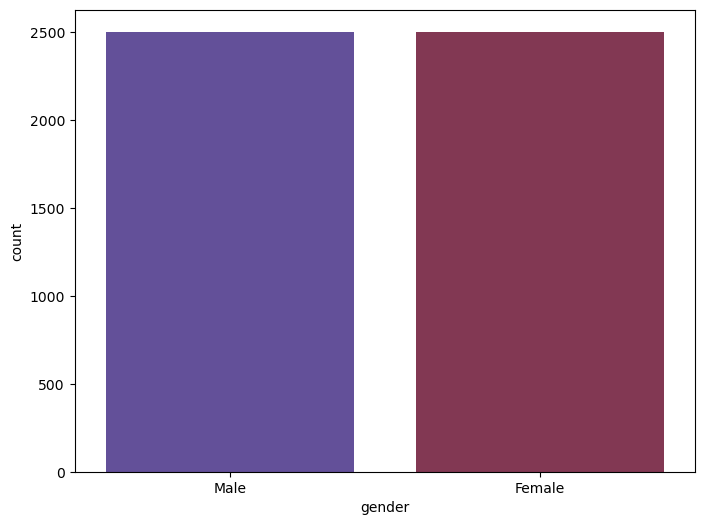

In [57]:
plt.figure(figsize=(8,6))
sns.countplot(x="gender",data=data,palette="twilight")

<AxesSubplot:>

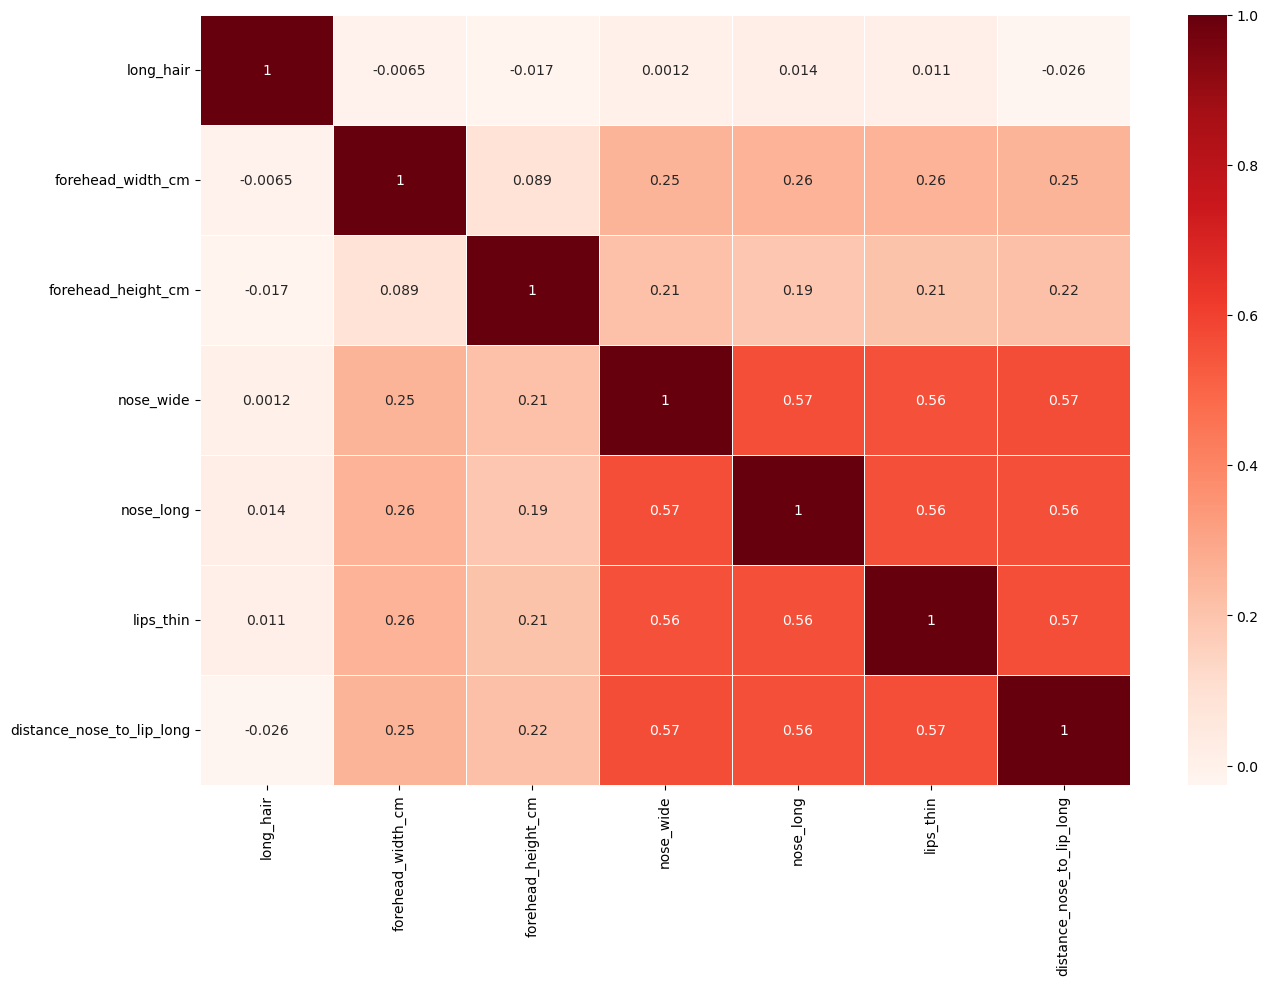

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,cmap="Reds")

In [12]:
m_col=['long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long','gender']

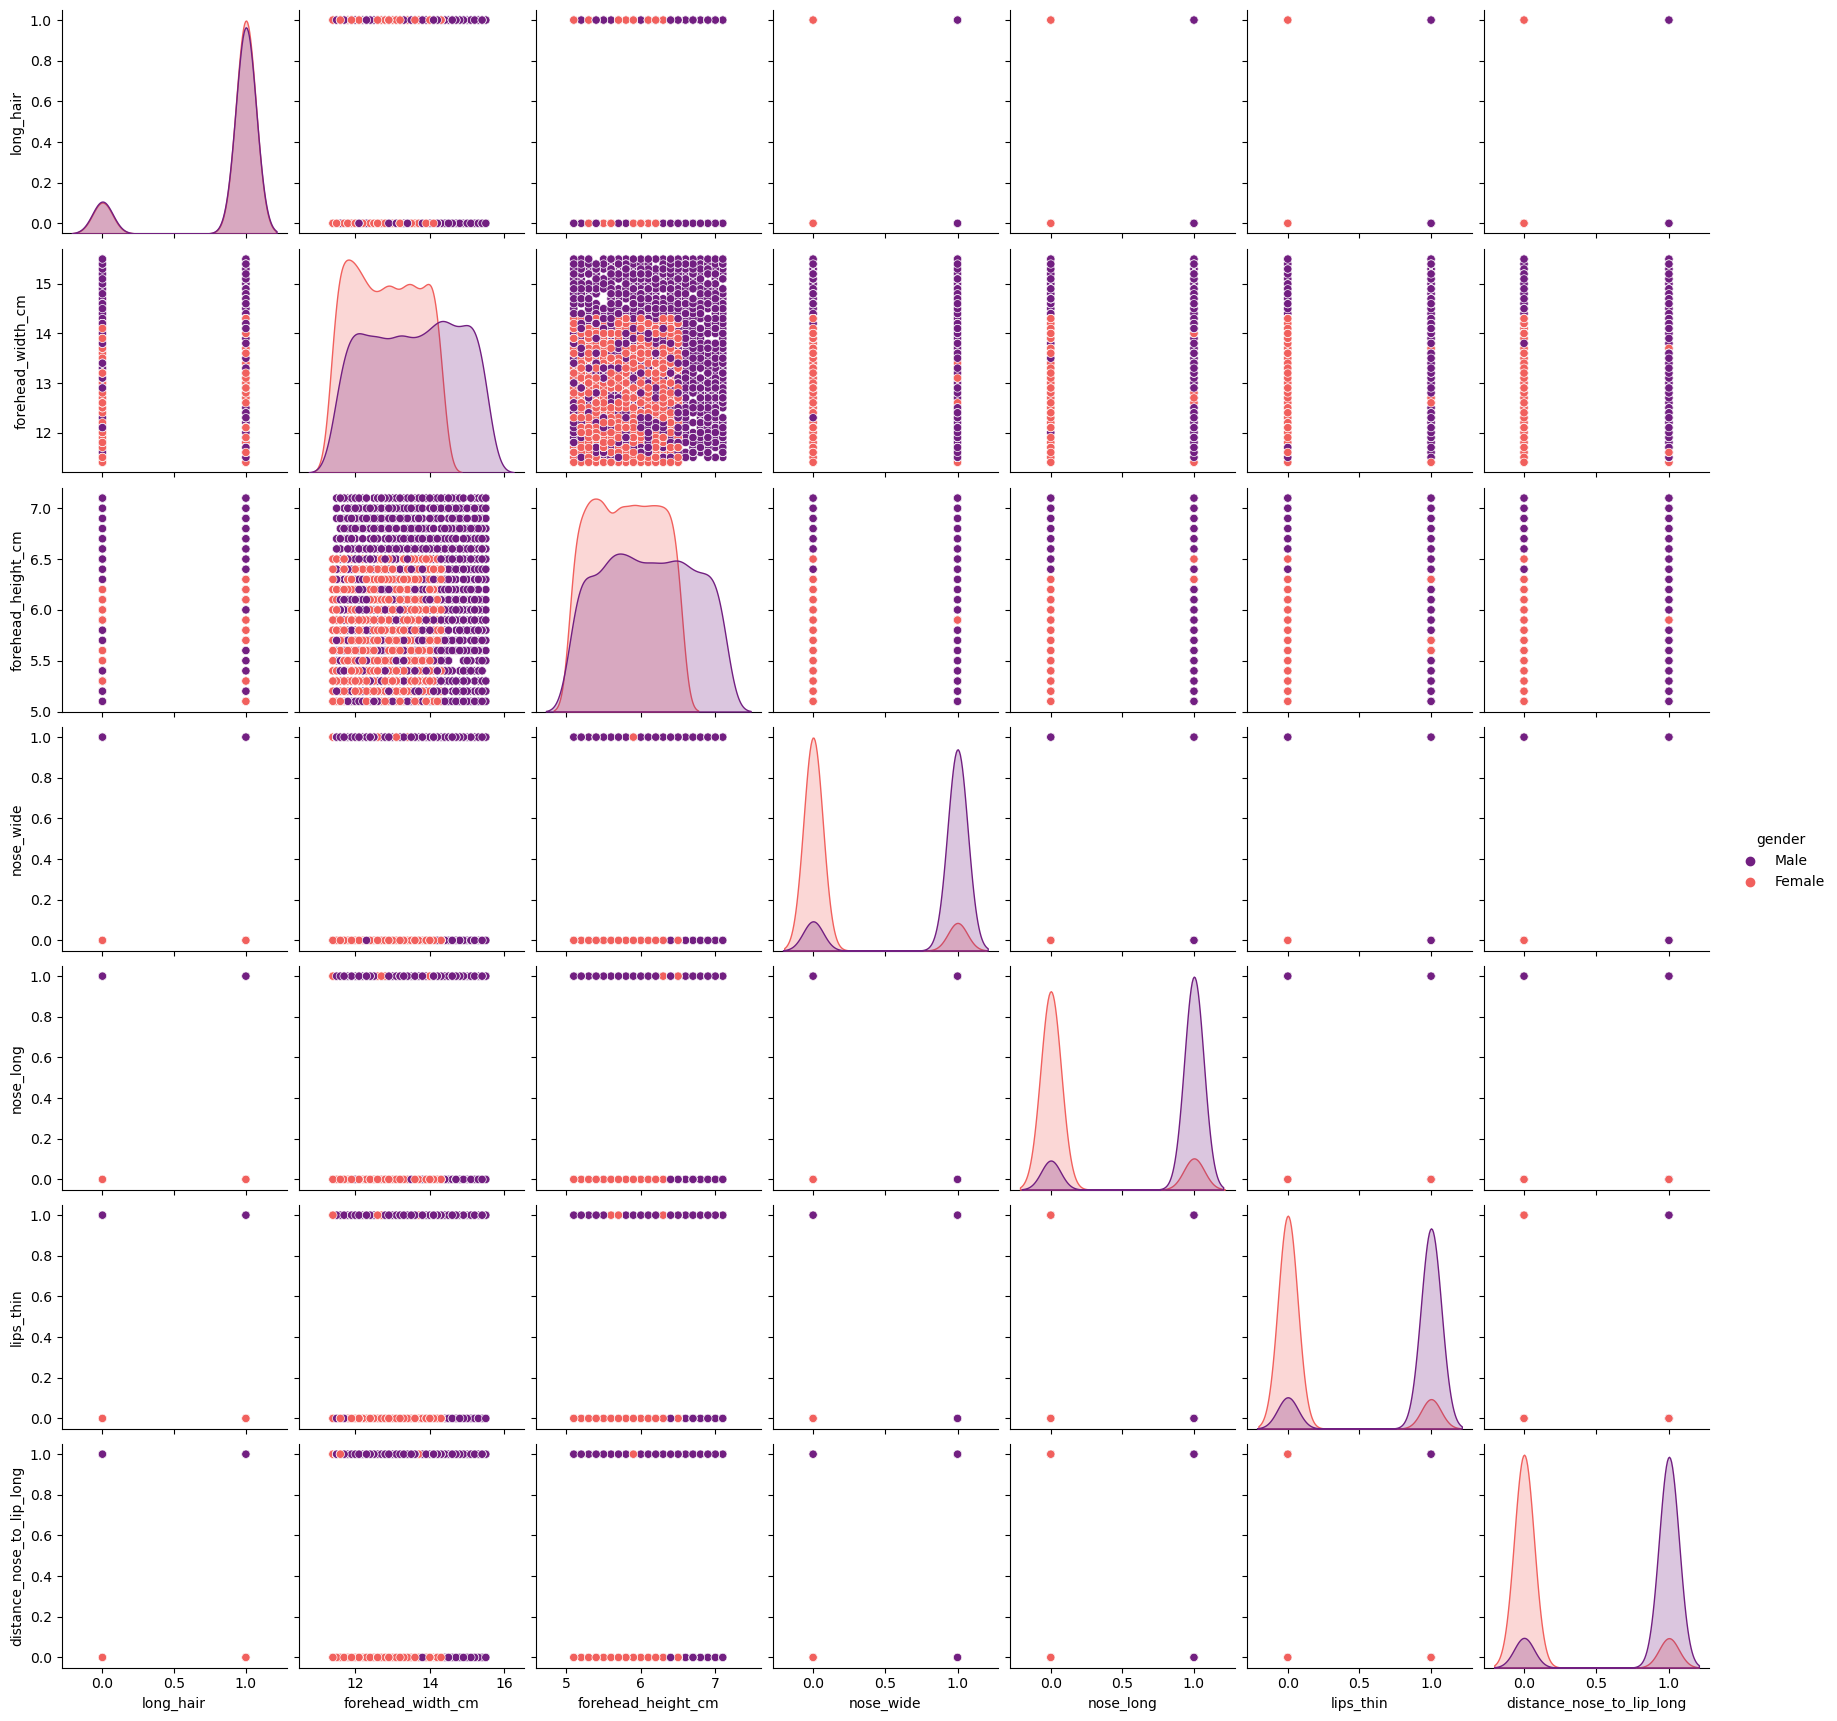

In [13]:
sns.pairplot(data[m_col],hue='gender',palette='magma')

In [14]:
x=data.drop('gender',axis=1)
y=data['gender']

In [15]:
x

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [16]:
y

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4996    Female
4997    Female
4998    Female
4999    Female
5000      Male
Name: gender, Length: 5001, dtype: object

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=1)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [33]:
logpredict=log.predict(x_train)
log_acc=accuracy_score(y_train,logpredict)
log_acc

0.9673333333333334

In [26]:
confusion_matrix(y_train,logpredict)

array([[1453,   47],
       [  51, 1449]], dtype=int64)

In [28]:
classification_report(y_train,logpredict)

'              precision    recall  f1-score   support\n\n      Female       0.97      0.97      0.97      1500\n        Male       0.97      0.97      0.97      1500\n\n    accuracy                           0.97      3000\n   macro avg       0.97      0.97      0.97      3000\nweighted avg       0.97      0.97      0.97      3000\n'

# K NEAREST NEIGHBORS

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
knnpredict=knn.predict(x_train)
knn_acc=accuracy_score(y_train,knnpredict)
knn_acc

C:\Users\rockz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.976

In [35]:
confusion_matrix(y_train,knnpredict)

array([[1476,   24],
       [  48, 1452]], dtype=int64)

In [36]:
classification_report(y_train,knnpredict)

'              precision    recall  f1-score   support\n\n      Female       0.97      0.98      0.98      1500\n        Male       0.98      0.97      0.98      1500\n\n    accuracy                           0.98      3000\n   macro avg       0.98      0.98      0.98      3000\nweighted avg       0.98      0.98      0.98      3000\n'

# RANDOM FORESTS

In [37]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()
ran.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
ranpredict=ran.predict(x_train)
ran_acc=accuracy_score(y_train,rpredict)
ran_acc

0.9986666666666667

In [41]:
confusion_matrix(y_train,ranpredict)

array([[1500,    0],
       [   4, 1496]], dtype=int64)

In [42]:
classification_report(y_train,ranpredict)

'              precision    recall  f1-score   support\n\n      Female       1.00      1.00      1.00      1500\n        Male       1.00      1.00      1.00      1500\n\n    accuracy                           1.00      3000\n   macro avg       1.00      1.00      1.00      3000\nweighted avg       1.00      1.00      1.00      3000\n'

# SVM

In [45]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [46]:
svmpredict=svm.predict(x_train)
svm_acc=accuracy_score(y_train,svmpredict)
svm_acc

0.9696666666666667

In [47]:
confusion_matrix(y_train,svmpredict)

array([[1459,   41],
       [  50, 1450]], dtype=int64)

In [48]:
classification_report(y_train,svmpredict)

'              precision    recall  f1-score   support\n\n      Female       0.97      0.97      0.97      1500\n        Male       0.97      0.97      0.97      1500\n\n    accuracy                           0.97      3000\n   macro avg       0.97      0.97      0.97      3000\nweighted avg       0.97      0.97      0.97      3000\n'

# Result

In [50]:
print(log_acc)
print(knn_acc)
print(ran_acc)
print(svm_acc)

0.9673333333333334
0.976
0.9986666666666667
0.9696666666666667


The accuracy of Logistic Regression Model is 96.73%
The accuracy of KNN Model is 97.60%
The accuracy of Random Forest Model is 99.86%
The accuracy of SVM Model is 96.96%

<AxesSubplot:>

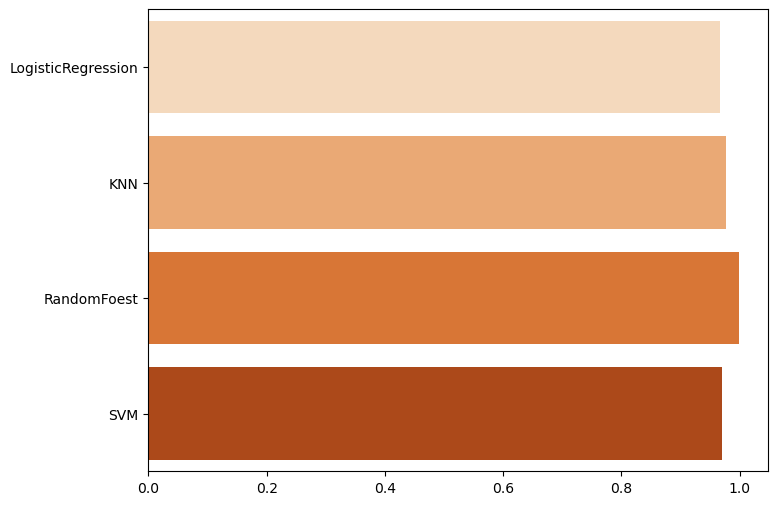

In [55]:
plt.figure(figsize=(8,6))
model_acc=[log_acc,knn_acc,ran_acc,svm_acc]
model_name=["LogisticRegression","KNN","RandomFoest","SVM"]
sns.barplot(x=model_acc,y=model_name,palette="Oranges")

# CONCLUSION

Random Forest Model gave best performance with an accuracy of 99.86%